In [59]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import pickle

# trace by stim
## bunnytop V1_high_res_i1350_220225_caiman

In [60]:
dir_path = r'Z:\All_Staff\home\lan\Data\2P_images\mat_inter\V1_i1350_220225_caiman'.replace('\\', '/')
data = sio.loadmat(dir_path + '/trace_trial_stim.mat')
stim_seq = data['stim_seq']
stim_id = [i[0] for i in stim_seq]
trace_by_trial = data['trace_by_trial']

ncell = trace_by_trial.shape[0]
nstim = len(np.unique(stim_id))
ntrial = trace_by_trial.shape[1]
nframe = trace_by_trial.shape[2]

In [61]:
trace_avg_cell = np.mean(np.mean(trace_by_trial, axis=0), axis=0)
trace_stim_avg = []
trace_stim_std = []
trace_stim_sem = []

for i in np.unique(stim_id):
    
    trace_istim_avg = np.mean(trace_by_trial[:, np.where(stim_id == i)[0]], axis=1) # ncell x nframe
    trace_istim_avg = np.mean(trace_istim_avg, axis=0) # nframe
    trace_istim_std = np.std(trace_by_trial[:, np.where(stim_id == i)[0]], axis=1)
    trace_istim_sem = trace_istim_std / np.sqrt(len(np.where(stim_id == i)[0]))

    trace_stim_avg.append(trace_istim_avg)
    trace_stim_std.append(trace_istim_std)
    trace_stim_sem.append(trace_istim_sem)

len(trace_stim_avg), trace_stim_avg[0].shape

(30, (143,))

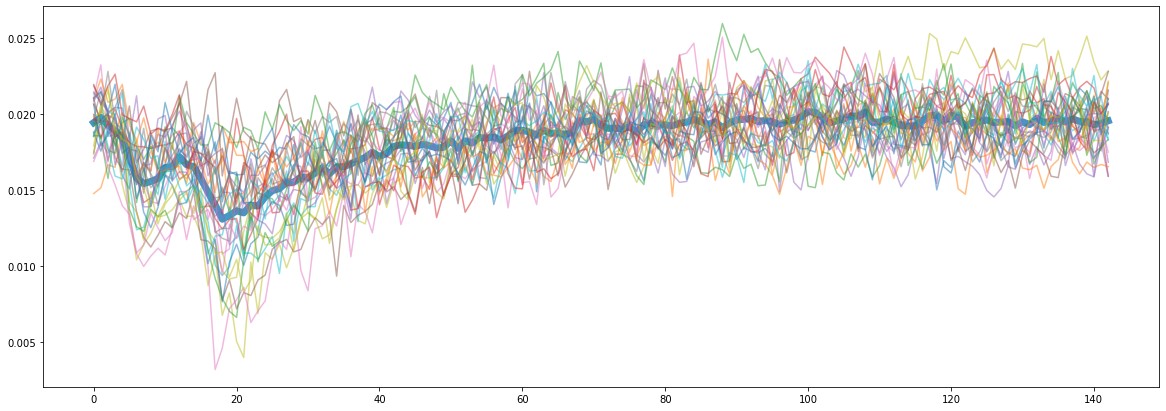

In [66]:
plt.figure(figsize=(20, 7))
plt.plot(trace_avg_cell, alpha=0.8, linewidth=7)
for i in np.unique(stim_id)-1:
    # plt.subplot(nstim, 1, i+1)
    plt.plot(trace_stim_avg[i], alpha=0.5)

## bunnytop V1_i1350_211222_caiman

In [67]:
dir_path = r'Z:\All_Staff\home\lan\Data\2P_images\mat_inter\V1_i1350_211222_caiman'.replace('\\', '/')
data = sio.loadmat(dir_path + '/trace_trial_stim.mat')
stim_seq = data['stim_seq']
stim_id = [i[0] for i in stim_seq]
trace_by_trial = data['trace_by_trial']

ncell = trace_by_trial.shape[0]
nstim = len(np.unique(stim_id))
ntrial = trace_by_trial.shape[1]
nframe = trace_by_trial.shape[2]
ncell, nstim, ntrial, nframe

(324, 30, 1461, 143)

In [68]:
trace_avg_cell = np.mean(np.mean(trace_by_trial, axis=0), axis=0)
trace_stim_avg = []
trace_stim_std = []
trace_stim_sem = []

for i in np.unique(stim_id):
    
    trace_istim_avg = np.mean(trace_by_trial[:, np.where(stim_id == i)[0]], axis=1) # ncell x nframe
    trace_istim_avg = np.mean(trace_istim_avg, axis=0) # nframe
    trace_istim_std = np.std(trace_by_trial[:, np.where(stim_id == i)[0]], axis=1)
    trace_istim_sem = trace_istim_std / np.sqrt(len(np.where(stim_id == i)[0]))

    trace_stim_avg.append(trace_istim_avg)
    trace_stim_std.append(trace_istim_std)
    trace_stim_sem.append(trace_istim_sem)

len(trace_stim_avg), trace_stim_avg[0].shape

(30, (143,))

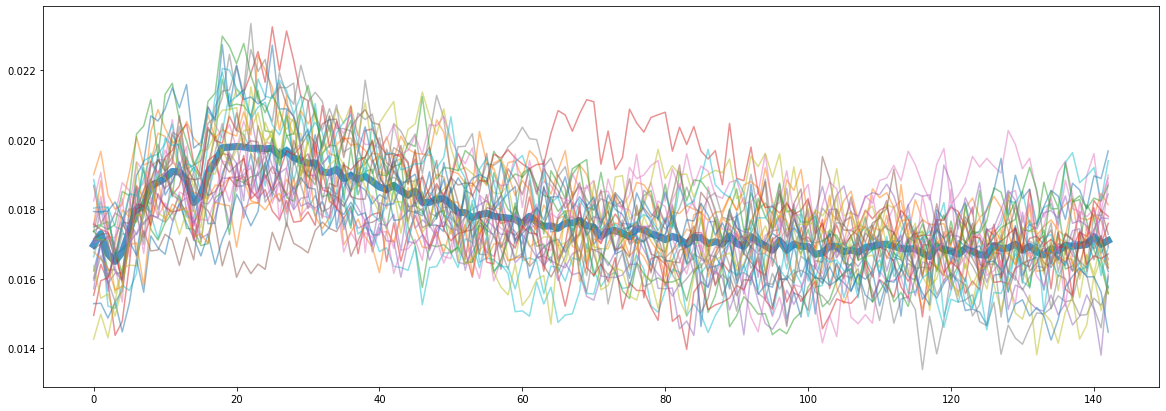

In [69]:
plt.figure(figsize=(20, 7))
plt.plot(trace_avg_cell, alpha=0.8, linewidth=7)
for i in np.unique(stim_id)-1:
    # plt.subplot(nstim, 1, i+1)
    plt.plot(trace_stim_avg[i], alpha=0.5)

# wrap into function

In [62]:
def load_data(dir_path):
    file_path = dir_path.replace('\\', '/')
    data = sio.loadmat(file_path + '/trace_trial_stim.mat')
    
    stim_seq = data['stim_seq']
    stim_id = [i[0] for i in stim_seq]
    trace_by_trial = data['trace_by_trial']

    ncell = trace_by_trial.shape[0]
    nstim = len(np.unique(stim_id))
    ntrial = trace_by_trial.shape[1]
    nframe = trace_by_trial.shape[2]
    print(ncell, nstim, ntrial, nframe)

    return stim_id, trace_by_trial, # ncell, nstim, ntrial, nframe


def calc_trace_stim(trace_by_trial, stim_id):
    trace_avg_cell = np.mean(np.mean(trace_by_trial, axis=0), axis=0)
    trace_stim_avg = []
    # trace_stim_std = []
    # trace_stim_sem = []

    for i in np.unique(stim_id):
        trace_istim_avg = np.mean(trace_by_trial[:, np.where(stim_id == i)[0]], axis=1) # ncell x nframe
        trace_istim_avg = np.mean(trace_istim_avg, axis=0) # nframe
        # trace_istim_std = np.std(trace_by_trial[:, np.where(stim_id == i)[0]], axis=1)
        # trace_istim_sem = trace_istim_std / np.sqrt(len(np.where(stim_id == i)[0]))

        trace_stim_avg.append(trace_istim_avg)
        # trace_stim_std.append(trace_istim_std)
        # trace_stim_sem.append(trace_istim_sem)

    print(len(trace_stim_avg), trace_stim_avg[0].shape)
    return trace_avg_cell, trace_stim_avg

## compare trace

In [63]:
# # normal V1 bunnytop
# dir_path = r'Z:\All_Staff\home\lan\Data\2P_images\mat_inter\V1_i1350_211222_caiman'
# stim_id, trace_by_trial = load_data(dir_path)
# trace_avg_cell, trace_stim_avg = calc_trace_stim(trace_by_trial, stim_id)

# # high res V1 bunnytop
# dir_path = r'Z:\All_Staff\home\lan\Data\2P_images\mat_inter\V1_i1350_220225_caiman'
# stim_id_highres, trace_by_trial_highres = load_data(dir_path)
# trace_avg_cell_highres, trace_stim_avg_highres = calc_trace_stim(trace_by_trial_highres, stim_id_highres)

# # high res V1 bunnytop, manual segmentation
# dir_path = r'Z:\All_Staff\home\lan\Data\2P_images\mat_inter\V1_i1350_220225'
# stim_id_manual, trace_by_trial_manual = load_data(dir_path)
# trace_avg_cell_manual, trace_stim_avg_manual = calc_trace_stim(trace_by_trial_manual, stim_id_manual)

# high res V1 bunnytop, young mouse caiman
dir_path = r'Z:\All_Staff\home\lan\Data\2P_images\mat_inter\V1_i1369_220310_caiman'
stim_id_young, trace_by_trial_young = load_data(dir_path)
trace_avg_cell_young, trace_stim_avg_young = calc_trace_stim(trace_by_trial_young, stim_id_young)

# high res V1 bunnytop, young mouse, manual segmentation
dir_path = r'Z:\All_Staff\home\lan\Data\2P_images\mat_inter\V1_i1369_220310'
stim_id_young_manual, trace_by_trial_young_manual = load_data(dir_path)
trace_avg_cell_young_manual, trace_stim_avg_young_manual = calc_trace_stim(trace_by_trial_young_manual, stim_id_young_manual)

# high res V1 bunnytop, young mouse, midway
dir_path = r'Z:\All_Staff\home\lan\Data\2P_images\mat_inter\V1_i1369_220310_midway'
stim_id_young_midway, trace_by_trial_young_midway = load_data(dir_path)
trace_avg_cell_young_midway, trace_stim_avg_young_midway = calc_trace_stim(trace_by_trial_young_midway, stim_id_young_midway)

# high res V1 bunnytop, 8f, manual
dir_path = r'Z:\All_Staff\home\lan\Data\2P_images\mat_inter\V1_i44415_220318'
stim_id_8f_manual, trace_by_trial_8f_manual = load_data(dir_path)
trace_avg_cell_8f_manual, trace_stim_avg_8f_manual = calc_trace_stim(trace_by_trial_8f_manual, stim_id_8f_manual)

256 30 1022 156
30 (156,)
155 30 511 156
30 (156,)
256 30 1022 156
30 (156,)
31 30 557 143
30 (143,)


In [64]:
# normalize trace to same max min
# trace_avg_cell = (trace_avg_cell - min(trace_avg_cell)) / (max(trace_avg_cell) - min(trace_avg_cell))
# trace_avg_cell_highres = (trace_avg_cell_highres - min(trace_avg_cell_highres)) / (max(trace_avg_cell_highres) - min(trace_avg_cell_highres))
# trace_avg_cell_manual = (trace_avg_cell_manual - min(trace_avg_cell_manual)) / (max(trace_avg_cell_manual) - min(trace_avg_cell_manual))
trace_avg_cell_young = (trace_avg_cell_young - min(trace_avg_cell_young)) / (max(trace_avg_cell_young) - min(trace_avg_cell_young))
trace_avg_cell_young_manual = (trace_avg_cell_young_manual - min(trace_avg_cell_young_manual)) / (max(trace_avg_cell_young_manual) - min(trace_avg_cell_young_manual))
trace_avg_cell_young_midway = (trace_avg_cell_young_midway - min(trace_avg_cell_young_midway)) / (max(trace_avg_cell_young_midway) - min(trace_avg_cell_young_midway))
trace_avg_cell_8f_manual = (trace_avg_cell_8f_manual - min(trace_avg_cell_8f_manual)) / (max(trace_avg_cell_8f_manual) - min(trace_avg_cell_8f_manual))

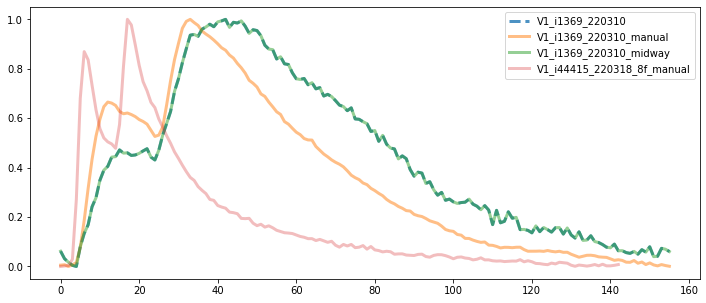

In [66]:
plt.figure(figsize=(12, 5))

# plt.subplot(2,1,1)
# plt.plot(trace_avg_cell, alpha=0.8, linewidth=3)
# plt.plot(trace_avg_cell_highres, alpha=0.2, linewidth=3)
# plt.plot(trace_avg_cell_manual, alpha=0.8, linewidth=3)
plt.plot(trace_avg_cell_young, alpha=0.8, linewidth=3, linestyle='--')
plt.plot(trace_avg_cell_young_manual, alpha=0.5, linewidth=3)
plt.plot(trace_avg_cell_young_midway, alpha=0.5, linewidth=3)
plt.plot(trace_avg_cell_8f_manual, alpha=0.3, linewidth=3)

plt.legend([#'V1_i1350_211222', 'V1_i1350_220225', 'V1_i1350_220225_manual', 
            'V1_i1369_220310', 'V1_i1369_220310_manual', 'V1_i1369_220310_midway', 'V1_i44415_220318_8f_manual']);

# plt.subplot(2,1,2)
# plt.plot(trace_avg_cell, alpha=0.8, linewidth=3)
# plt.plot(- trace_avg_cell_highres + 0.035, alpha=0.8, linewidth=3)
# plt.plot((trace_avg_cell - 0.016) * 1.3, alpha=0.8, linewidth=3)
# plt.plot(- trace_avg_cell_highres + 0.035 - 0.016, alpha=0.8, linewidth=3)

# vis trace

In [55]:
def load_vis(dir_path):
    with open(dir_path + '/vis_driven.pickle', 'rb') as f:
        p_anova, p_kruskal, evoked, p_ttest = pickle.load(f)
    
    # visually driven cells: pass (anova OR kruskal) AND amp threshold for >=1 image
    p_sig = 0.01
    vis_driven = ((p_anova < p_sig) | (p_kruskal < p_sig)) & (sum(evoked.T > 0.1) > 0).reshape(-1, 1)
    print(f'{vis_driven.sum()} cells are visually driven, \n\
        proportion {np.round(vis_driven.sum()/ncell, 2)} out of {ncell} cells')

    # cells responsive to image i: pass visually driven (anova OR kruskal) AND t-test AND amp threshold for *this* image
    img_driven = vis_driven & (p_ttest < p_sig) & (evoked > 0.1)
    print(f'{img_driven.sum()} cells are image driven - with overlap between images, \n\
        proportion {np.round(img_driven.sum() / (ncell*nstim), 2)} out of {ncell*nstim} cell-stim combos. \n\
        1-30 image evokes resp from {np.sum(img_driven, axis=0)} cells')

    t = np.sum(img_driven, axis=1)
    print(f'img driven cells are driven by {t[t>0]} images')

    return vis_driven, img_driven

In [56]:
# high res V1 bunnytop, young mouse, midway
dir_path = r'Z:\All_Staff\home\lan\Data\2P_images\mat_inter\V1_i1369_220310_midway'
stim_id_young_midway, trace_by_trial_young_midway = load_data(dir_path)
vis_driven_young_midway, img_driven_young_midway = load_vis(dir_path)
vis_trace_by_trial_young_midway = trace_by_trial_young_midway[vis_driven_young_midway.flatten(), :, :]
trace_avg_cell_young_midway, trace_stim_avg_young_midway = calc_trace_stim(vis_trace_by_trial_young_midway, stim_id_young_midway)

# high res V1 bunnytop, young mouse, manual segmentation
dir_path = r'Z:\All_Staff\home\lan\Data\2P_images\mat_inter\V1_i1369_220310'
stim_id_young_manual, trace_by_trial_young_manual = load_data(dir_path)
# vis_driven_young_manual, img_driven_young_manual = load_vis(dir_path)
vis_trace_by_trial_young_manual = trace_by_trial_young_manual#[vis_driven_young_manual.flatten(), :, :]
trace_avg_cell_young_manual, trace_stim_avg_young_manual = calc_trace_stim(vis_trace_by_trial_young_manual, stim_id_young_manual)

256 30 1022 156
105 cells are visually driven, 
        proportion 1.19 out of 88 cells
23 cells are image driven - with overlap between images, 
        proportion 0.01 out of 2640 cell-stim combos. 
        1-30 image evokes resp from [1 0 0 0 0 1 2 1 1 0 1 0 0 0 2 0 1 0 5 0 1 2 0 3 0 1 0 1 0 0] cells
img driven cells are driven by [1 1 2 4 1 1 1 2 2 1 1 3 1 1 1] images
30 (156,)
155 30 511 156
30 (156,)


In [57]:
# with open(dir_path + '/vis_driven.pickle', 'rb') as f:
#     x = pickle.load(f)

# x.shape, trace_by_trial_young_manual.shape

trace_avg_cell_young_manual = (trace_avg_cell_young_manual - min(trace_avg_cell_young_manual)) / (max(trace_avg_cell_young_manual) - min(trace_avg_cell_young_manual))
trace_avg_cell_young_midway = (trace_avg_cell_young_midway - min(trace_avg_cell_young_midway)) / (max(trace_avg_cell_young_midway) - min(trace_avg_cell_young_midway))

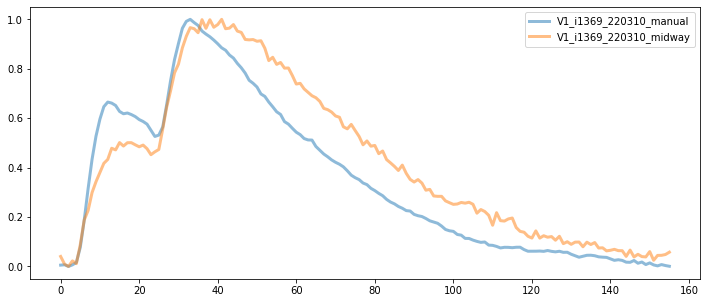

In [58]:
plt.figure(figsize=(12, 5))

# plt.subplot(2,1,1)
# plt.plot(trace_avg_cell, alpha=0.8, linewidth=3)
# plt.plot(trace_avg_cell_highres, alpha=0.2, linewidth=3)
# plt.plot(trace_avg_cell_manual, alpha=0.8, linewidth=3)
# plt.plot(trace_avg_cell_young, alpha=0.8, linewidth=3, linestyle='--')
plt.plot(trace_avg_cell_young_manual, alpha=0.5, linewidth=3)
plt.plot(trace_avg_cell_young_midway, alpha=0.5, linewidth=3)

plt.legend([#'V1_i1350_211222', 'V1_i1350_220225', 'V1_i1350_220225_manual', 
            # 'V1_i1369_220310', 
            'V1_i1369_220310_manual', 'V1_i1369_220310_midway']);

# plt.subplot(2,1,2)
# plt.plot(trace_avg_cell, alpha=0.8, linewidth=3)
# plt.plot(- trace_avg_cell_highres + 0.035, alpha=0.8, linewidth=3)
# plt.plot((trace_avg_cell - 0.016) * 1.3, alpha=0.8, linewidth=3)
# plt.plot(- trace_avg_cell_highres + 0.035 - 0.016, alpha=0.8, linewidth=3)